In [1]:
import pandas as pd

In [2]:
url = 'Corona Virus Dataset.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Province,Country/Region,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0
1,Afghanistan,Afghanistan,33.93911,67.709953,23-01-2020,0,0,0
2,Afghanistan,Afghanistan,33.93911,67.709953,24-01-2020,0,0,0
3,Afghanistan,Afghanistan,33.93911,67.709953,25-01-2020,0,0,0
4,Afghanistan,Afghanistan,33.93911,67.709953,26-01-2020,0,0,0


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [6]:
df.dtypes

Province                  object
Country/Region            object
Latitude                 float64
Longitude                float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [7]:
df.rename(columns = {'Country/Region':'Country'},inplace = True)

In [8]:
df_1 = df[['Country','Confirmed','Deaths','Recovered']]

In [9]:
df_1 = df_1.groupby(['Country'],as_index =True).sum()

In [10]:
df_1.head()

,Confirmed,Deaths,Recovered
Country,,,
Afghanistan,89861,3527,61438
Algeria,133388,3571,92966
Argentina,4124190,85343,3721350
Australia,30365,911,26737
Austria,648620,10663,634624


In [11]:
# Create a bar chart comparing death tolls in differnt countries

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
df_deaths = df_1.sort_values(by = 'Deaths',ascending =False)

In [14]:
df_Top10 = df_deaths.head(10)

Text(0.5, 1.0, 'Top 10 countries by Death toll')

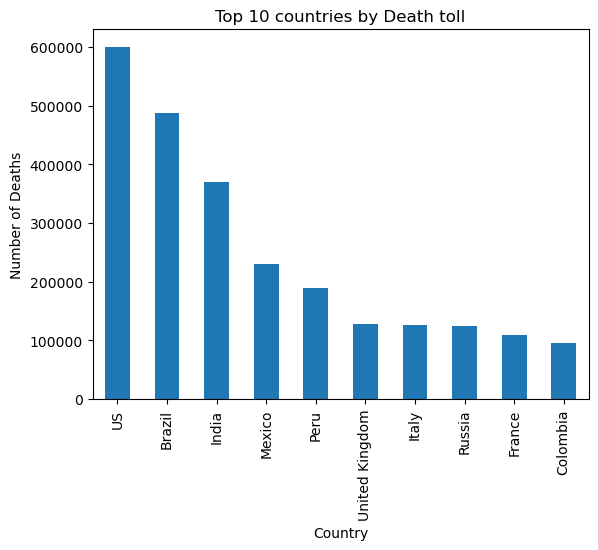

In [15]:
df_Top10['Deaths'].plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Top 10 countries by Death toll')

In [16]:
df_Bottom10 = df_deaths.tail(10)

Text(0.5, 1.0, 'Bottom 10 countries by Death toll')

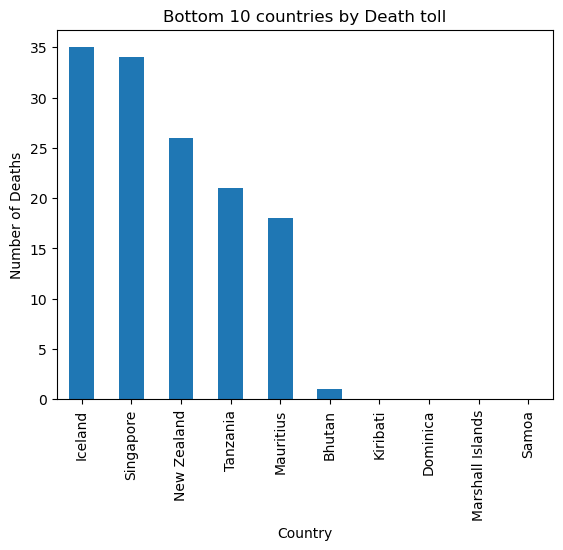

In [17]:
df_Bottom10['Deaths'].plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Bottom 10 countries by Death toll')

In [18]:
# Make a pie chart that shows the global death rate percentage

In [19]:
df_1

,Confirmed,Deaths,Recovered
Country,,,
Afghanistan,89861,3527,61438
Algeria,133388,3571,92966
Argentina,4124190,85343,3721350
Australia,30365,911,26737
Austria,648620,10663,634624
...,...,...,...
Vietnam,10630,60,4050
West Bank and Gaza,311534,3533,303826
Yemen,6863,1349,3743


In [20]:
df_1['death_rate_percentage'] = (df_1['Deaths']/df_1['Confirmed'])* 100

In [21]:
df_1

,Confirmed,Deaths,Recovered,death_rate_percentage
Country,,,,
Afghanistan,89861,3527,61438,3.924951
Algeria,133388,3571,92966,2.677152
Argentina,4124190,85343,3721350,2.069328
Australia,30365,911,26737,3.000165
Austria,648620,10663,634624,1.643952
...,...,...,...,...
Vietnam,10630,60,4050,0.564440
West Bank and Gaza,311534,3533,303826,1.134066
Yemen,6863,1349,3743,19.656127


In [22]:
df_Top5_perc = df_1['death_rate_percentage'].sort_values(ascending = False).head(5)

In [23]:
df_Top5_perc 

Country
Yemen     19.656127
Peru       9.418329
Mexico     9.377893
Syria      7.294269
Egypt      5.718898
Name: death_rate_percentage, dtype: float64

Text(0.5, 1.0, 'Top 5 global percentage death rate ')

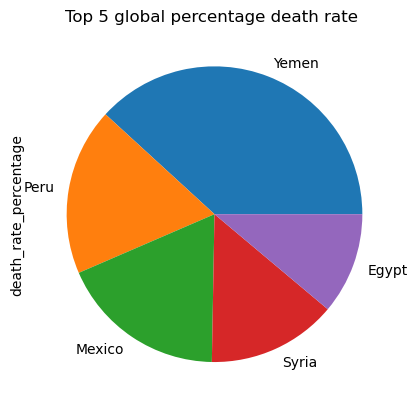

In [24]:
df_Top5_perc.plot(kind ='pie')
plt.title('Top 5 global percentage death rate ')

In [25]:
# find the comparative analysis of  recovery in top 5 countries

In [26]:
df.head()

,Province,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0
2,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-24,0,0,0
3,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-25,0,0,0
4,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-26,0,0,0


In [27]:
df_Top5_recovered = df[['Country','Recovered']]

In [28]:
df_Top5_recovered.groupby(['Country'],as_index = True).sum()

,Recovered
Country,
Afghanistan,61438
Algeria,92966
Argentina,3721350
Australia,26737
Austria,634624
...,...
Vietnam,4050
West Bank and Gaza,303826
Yemen,3743


In [29]:
df_Top5_recovered.sort_values(by = 'Recovered',ascending = False,inplace = True)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\2129944722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Top5_recovered.sort_values(by = 'Recovered',ascending = False,inplace = True)


In [30]:
df_Top5_recovered = df_Top5_recovered.head()

In [31]:
df_Top5_recovered

,Country,Recovered
69040,Turkey,1123456
34075,India,422436
34076,India,389851
10459,Brazil,388340
34066,India,386404


In [32]:
df_Top5_recovered.set_index('Country',inplace = True)

Text(0.5, 1.0, 'Top 5 Countries per Recovery cases')

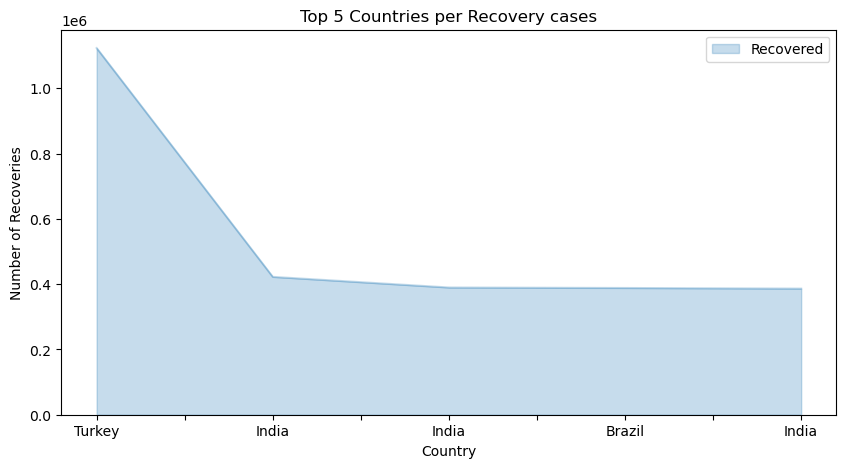

In [33]:
df_Top5_recovered.plot(kind = 'area',alpha = 0.25,figsize = (10,5))
plt.xlabel('Country')
plt.ylabel('Number of Recoveries')
plt.title('Top 5 Countries per Recovery cases')

In [34]:
# create a graph of daily average of confirmed and recovered

In [119]:
df.head()

,Province,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0
2,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-24,0,0,0
3,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-25,0,0,0
4,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-26,0,0,0


In [120]:
df_avg = df[['Date','Confirmed','Recovered']]

In [121]:
df_avg['Day'] = df_avg['Date'].dt.day

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\2285930789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg['Day'] = df_avg['Date'].dt.day


In [122]:
df_avg = df_avg.groupby(['Day'],as_index = True).mean()

In [123]:
df_avg.drop('Date',axis = 1,inplace =True)

Text(0.5, 1.0, 'Daily Average for Confirmed and Recovered cases')

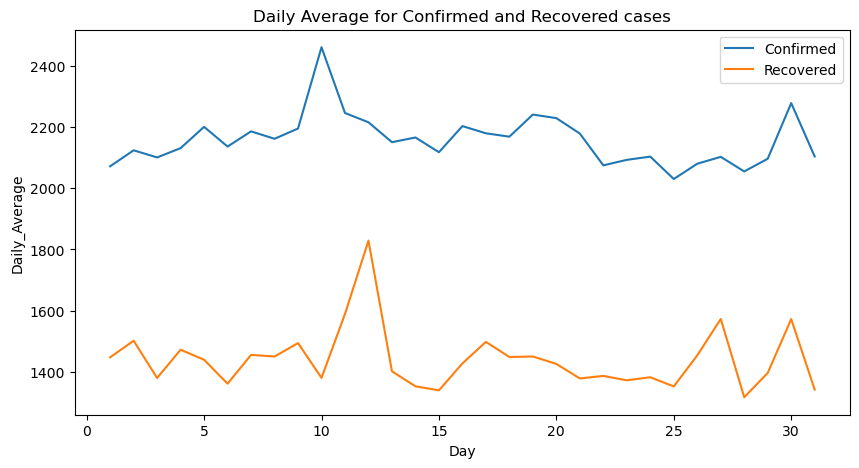

In [124]:
df_avg.plot(kind = 'line',figsize = (10,5))
plt.xlabel('Day')
plt.ylabel('Daily_Average')
plt.title('Daily Average for Confirmed and Recovered cases')

In [40]:
# Line graph show recovery trend over time

In [110]:
df.head()

,Province,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0
2,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-24,0,0,0
3,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-25,0,0,0
4,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-26,0,0,0


In [111]:
df_Recovered = df[['Date','Recovered']]

In [112]:
df_Recovered['Month'] = df_Recovered['Date'].dt.month

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\2028041458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Recovered['Month'] = df_Recovered['Date'].dt.month


In [113]:
df_Recovered.drop('Date',axis = 1,inplace =True)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\4287098997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Recovered.drop('Date',axis = 1,inplace =True)


In [114]:
df_Recovered = df_Recovered.groupby(['Month'],as_index = True).sum()

In [115]:
df_Recovered

,Recovered
Month,
1,9164490
2,6751190
3,8021083
4,14998494
5,20651389
6,8079855
7,4693120
8,6202833
9,6647749


Text(0.5, 1.0, ' Recovery Trend Overtime')

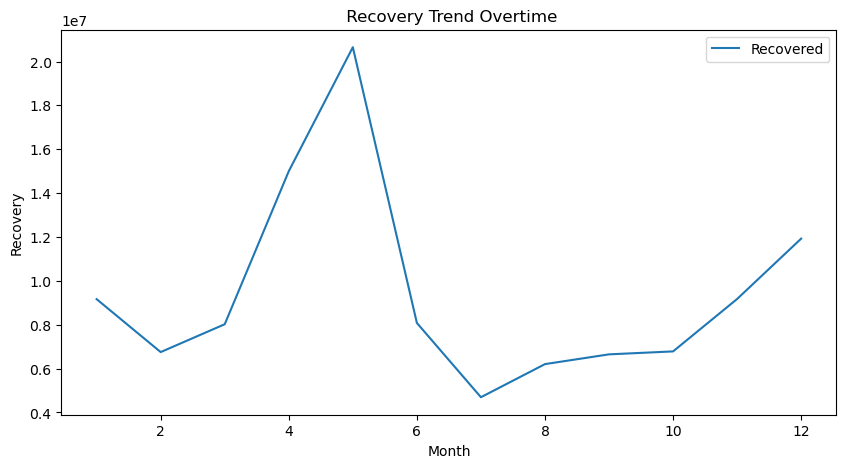

In [116]:
df_Recovered.plot(kind = 'line',figsize = (10,5))
plt.xlabel('Month')
plt.ylabel('Recovery')
plt.title(' Recovery Trend Overtime')

In [43]:
# Trend Analysis for the past 18 months.

In [135]:
df.head()

,Province,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0
2,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-24,0,0,0
3,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-25,0,0,0
4,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-26,0,0,0


In [136]:
df_3 = df[['Date','Confirmed','Deaths','Recovered']]

In [137]:
df_3['Month'] = df_3['Date'].dt.month


C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\3477459223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Month'] = df_3['Date'].dt.month


In [138]:
df_3.drop('Date',axis = 1,inplace = True)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\1407961259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.drop('Date',axis = 1,inplace = True)


In [139]:
df_3 = df_3.groupby(['Month'],as_index = True).sum()

In [140]:
df_3

,Confirmed,Deaths,Recovered
Month,,,
1,18678589,402083,9164490
2,10560976,300890,6751190
3,14694026,323966,8021083
4,24047819,554220,14998494
5,21865416,511110,20651389
6,8991916,270414,8079855
7,6838092,167613,4693120
8,7694938,179200,6202833
9,8244794,160671,6647749


Text(0.5, 1.0, 'Trend Analysis for January 2020 to June 2021')

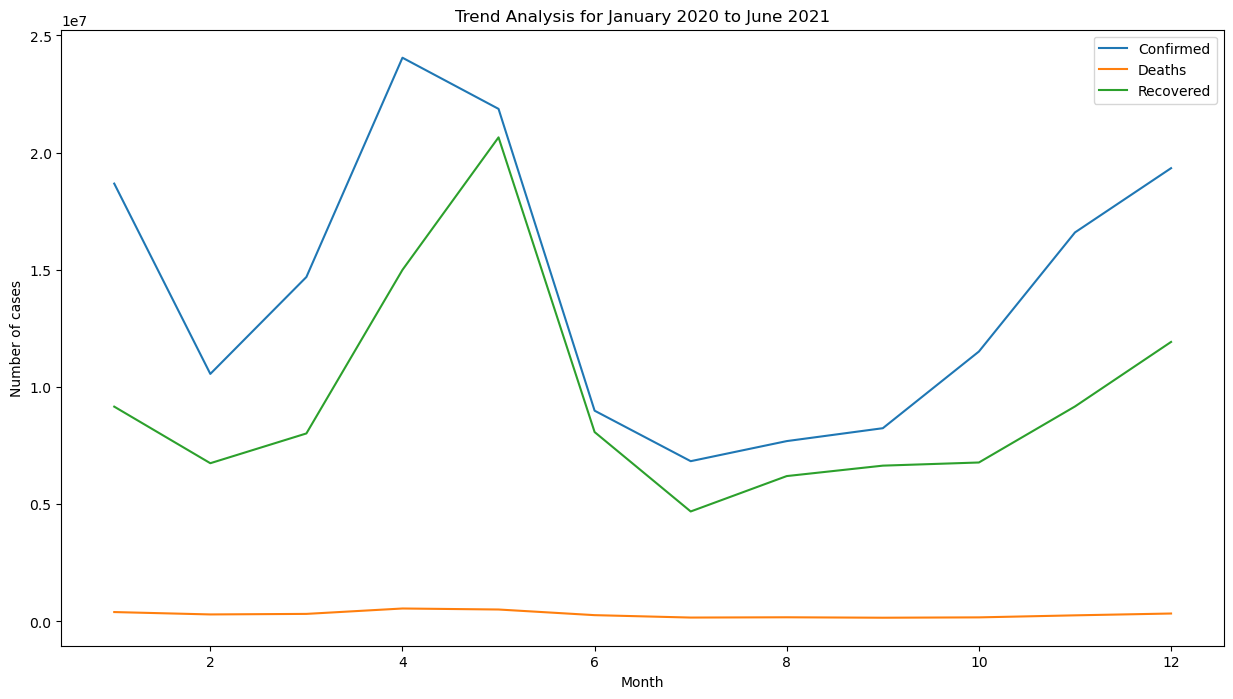

In [141]:
df_3.plot(kind = 'line',figsize = (15,8))
plt.xlabel('Month')
plt.ylabel('Number of cases')
plt.title('Trend Analysis for January 2020 to June 2021')

In [51]:
# Create a map for confirmed cases highlighting areas with Highest and lowest recorded cases

In [52]:
!pip install pandas geopandas matplotlib

In [53]:
import geopandas as gpd

In [54]:
country_data = df.groupby('Country')['Confirmed'].sum().reset_index()

In [55]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4704\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [56]:
world = world.merge(country_data, how='left', left_on='name', right_on='Country')

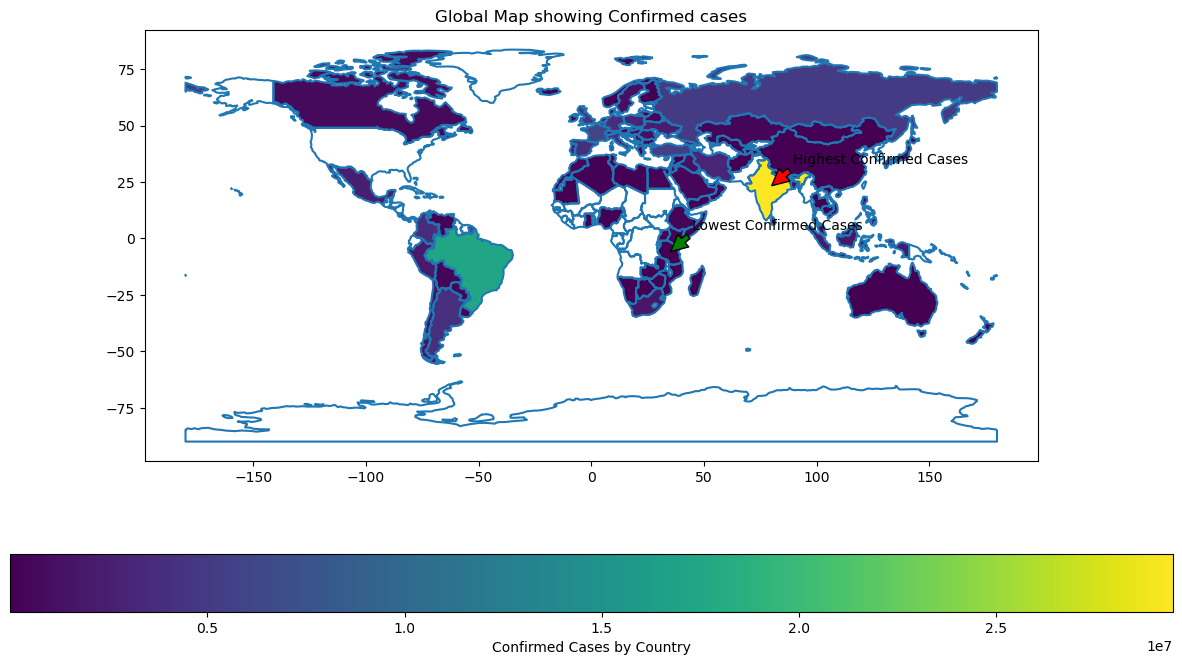

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax)
world.plot(column='Confirmed', ax=ax, legend=True,
           legend_kwds={'label': "Confirmed Cases by Country",
                        'orientation': "horizontal"})

highest_confirmed = world.loc[world['Confirmed'].idxmax()]
lowest_confirmed = world.loc[world['Confirmed'].idxmin()]

ax.annotate('Highest Confirmed Cases', xy=(highest_confirmed.geometry.centroid.x, highest_confirmed.geometry.centroid.y),
            xytext=(highest_confirmed.geometry.centroid.x + 10, highest_confirmed.geometry.centroid.y + 10),
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate('Lowest Confirmed Cases', xy=(lowest_confirmed.geometry.centroid.x, lowest_confirmed.geometry.centroid.y),
            xytext=(lowest_confirmed.geometry.centroid.x + 10, lowest_confirmed.geometry.centroid.y + 10),
            arrowprops=dict(facecolor='green', shrink=0.05))
plt. title('Global Map showing Confirmed cases')
plt.show()
